<a href="https://colab.research.google.com/github/samaya1712/CIENCIA-DE-DATOS/blob/main/Taller_16_09_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ACTIVIDAD

##1. Calcule las mismas métricas en su propio dataset.

In [1]:
#Consiguiendo el dataset directamente desde google drive. Para ello,
#se debe dar permisos a colab de ingresar a google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install statsmodels

In [6]:
!pip install wquantiles

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/base_aviacion_1.csv")

In [38]:
data.head()

,userid,gender,bookingchannel,cabinclass,complaints,flightdistance_new,ticketprice_new,departuretime_new,arrivaltime_new,flightduration_new,age_new
0,1,Male,Phone,Business,0,825,598,7,16,52,24
1,2,Male,Online,First,9,1843,2211,1,15,590,60
2,3,Female,Agency,First,2,5465,631,12,20,573,47
3,4,Female,Phone,First,3,4448,995,13,21,1161,38
4,5,Male,Agency,Business,2,817,1284,10,17,28,10


In [10]:
#Generando cálculos de desviación estándar y cuantiles
data["flightdistance_new"].std()

1446.0604990590039

In [11]:
#Calculando IQR
data.flightdistance_new.quantile(0.75)-data.flightdistance_new.quantile(0.25)

2030.0

In [12]:
robust.scale.mad(data["flightdistance_new"])

1676.081808020583

La MAD es mayor que la Desviacion estandar

In [36]:
#Calculando percentiles de las quejas
data["complaints"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,complaints
0.05,0.00
0.25,2.00
0.50,4.00
0.75,7.75
0.95,9.55


Text(0, 0.5, 'Distancia de vuelo')

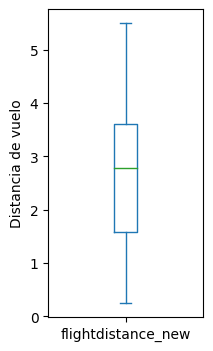

In [16]:
#Dibujando diagramas de caja
ax = (data.flightdistance_new/1_000).plot.box(figsize=(2,4))
ax.set_ylabel("Distancia de vuelo en KM")

In [17]:
#Calculando la tabla de frecuencias e histogramas
binnedflightdistance_new=pd.cut(data["flightdistance_new"],10)
binnedflightdistance_new.value_counts()

,count
flightdistance_new,
"(774.9, 1299.8]",7
"(2349.6, 2874.5]",7
"(2874.5, 3399.4]",7
"(4974.1, 5499.0]",6
"(1299.8, 1824.7]",5
"(1824.7, 2349.6]",5
"(3399.4, 3924.3]",5
"(244.751, 774.9]",3
"(3924.3, 4449.2]",3


Text(0, 0.5, 'Distancia de vuelo')

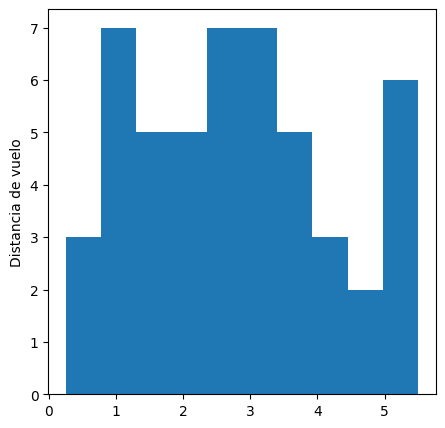

In [24]:
#Histograma de distancia de vuelo:
ax = (data.flightdistance_new/1_000).plot.hist(figsize=(5,5))
ax.set_ylabel("Distancia de vuelo")

Text(0.5, 0, 'Quejas')

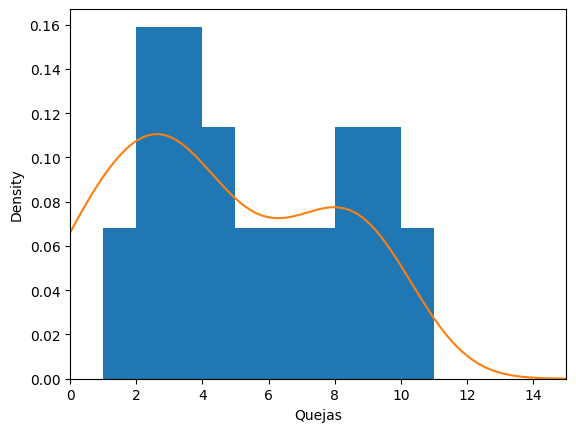

In [35]:
#Diagrama de dispersión y curva de densidad
ax=data["complaints"].plot.hist(density=True,xlim=[0,15],bins=range(1,12))
data["complaints"].plot.density(ax=ax)
ax.set_xlabel("Quejas")

##2. Responda las siguientes preguntas.

### Sobre Estimaciones de variabilidad
##1.  Qué significa que la desviación estándar es casi dos veces mayor que la MAD?
La desviacion estandar se ve afectada por algunos datos que son extremos lo que incrementa considerablemente la dispersión general de los datos. Por otra parte, la MAD se basa en la mediana por lo que menos sensible a valores atípicos o extremos. Lo que genera que la desviacion estandar sera dos veces mayor que la MAD
##2. Cómo puedo mejorar esta situación?
Para mejorar esta situacion, si los valores atípicos no son relevantes o son errores, puedes considerar eliminarlos o si los valores atípicos son parte importante de los datos, puedes aplicar transformaciones como la transformación logarítmica o la raíz cuadrada para reducir su impacto.
##3. Explique el resultado obtenido al calcular IQR
El IQR demuestra que los datos estan bastantes dispersos, lo que demuestra una gran variabilidad entre el 25% inferior y el 25% superior de los valores.

### Sobre exploración en distribución de datos
##1. Qué información nos suministra los percentiles de tasa de homicidios por estados?
El 5% de los estados tienen una tasa de homicidios igual o menor a 1.6.
El 25% de los estados tienen una tasa de homicidios igual o menor a 2.425.
El 50% de los estados tienen una tasa de homicidios igual o menor a 4.
El 75% de los estados tienen una tasa de homicidios igual o menor a 5.55.
El 95% de los estados tienen una tasa de homicidios igual o menor a 6.51.
##2. Explique con sus propias palabras qué información suministra el diagrama de caja con respecto a la tasa de homicidios por estado.
La informacion que nos suministra el diagrama de cajas y bigotes, es que la media de poblacion se acerca de los 5 millones de personas y hay ciertos datos rezagados entre los 15 y 40 millones de personas
##3. Cómo podría agregarse los estados que se encuentran en cada uno de los intervalos? Si no sabe la respuesta, complete la tabla de forma manual y postee su respuesta. Interprete los resultados obtenidos.
analisis=estado.head()
g=sns.FacetGrid(analisis,col="State")
g.map(sns.distplot,"Murder.Rate")
Para agregar los estados que se encuentran en cada uno de los intervalos en el codigo estado.head(50) para tener la informacion de todos los estados que se encuentran en la base de datos y asi obtener los estados que se encuentran en cada uno de los intervalos
##4. Explique el resultado obtenido por el diagrama de dispersión.
Esta línea es una estimación suavizada de la distribución de la tasa de asesinatos. Sugiere una forma general de la distribución, destacando la presencia de dos modas (bimodalidad), como se refleja en los dos picos del histograma.
